<a href="https://colab.research.google.com/github/micah-shull/Machine_Learning_Pipelines/blob/main/pipelines_02_pca_clustering_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA Clustering

### **What is PCA Clustering?**
PCA clustering is a technique that combines **Principal Component Analysis (PCA)** and **clustering methods** (like K-Means) to group similar data points together in a lower-dimensional space. This approach is useful when working with high-dimensional datasets, as PCA helps reduce dimensionality while preserving as much variance as possible, making clustering more efficient and meaningful.

---

### **Why Use PCA for Clustering?**
1. **Dimensionality Reduction**: High-dimensional data can be challenging for clustering algorithms like K-Means because of the **curse of dimensionality**. PCA helps by reducing the number of features while maintaining the essential structure of the data.
2. **Improved Clustering Performance**: By removing noise and redundant features, PCA often leads to **better-defined clusters** and improved separation between groups.
3. **Visualization**: Clustering high-dimensional data is difficult to interpret. PCA allows you to **visualize clusters** in 2D or 3D using its principal components.
4. **Efficiency**: Fewer dimensions mean **faster computation** and **less memory usage**, making clustering algorithms like K-Means more efficient.
5. **De-correlates Features**:**Orthogonal Components**: PCA transforms features into orthogonal components, which are uncorrelated. This can help clustering algorithms like K-Means that assume clusters are spherical in shape.
- **Improves Clustering Quality**: De-correlated features can improve the quality of the clusters formed by the algorithm.

### 5. **Preprocessing for Clustering**
- **Standardization and Scaling**: PCA includes steps to standardize and scale the data, which are important preprocessing steps for many clustering algorithms.
- **Consistent Preprocessing**: Using PCA ensures that data is preprocessed consistently before clustering, leading to more reliable results.

---

### **How Does PCA Clustering Work?**
1. **Preprocess the Data**:
   - Standardize numeric features to ensure equal scaling.
   - Encode categorical variables using One-Hot Encoding.
   - Handle missing values appropriately.
2. **Apply PCA**:
   - Reduce the dataset to a lower-dimensional space by selecting the top principal components.
   - PCA transforms the original features into **uncorrelated** principal components ordered by variance.
3. **Cluster in the PCA Space**:
   - Apply **K-Means clustering** (or another clustering algorithm) to the PCA-transformed data.
   - Assign cluster labels to each data point.
4. **Evaluate the Clustering**:
   - Compute a **Silhouette Score** to assess how well-separated the clusters are.
   - Visualize the clusters using the first two PCA components.

---

### **Interpreting the Results**
1. **Silhouette Score**:
   - Measures how well clusters are separated.
   - Values range from -1 to 1:
     - **Close to 1**: Well-separated clusters.
     - **Close to 0**: Overlapping clusters.
     - **Negative**: Incorrect clustering (some points are assigned to the wrong cluster).

2. **Cluster Visualization**:
   - The scatter plot helps **identify patterns** in the clusters.
   - Different colors represent **different cluster assignments**.

---

### **When to Use PCA Clustering?**
✅ **High-Dimensional Data**: When you have many features and need to simplify them.  
✅ **Reducing Noise**: If raw features contain a lot of redundant or noisy data.  
✅ **Computational Efficiency**: PCA speeds up clustering when working with large datasets.  
✅ **Better Cluster Separation**: If K-Means performs poorly on the original dataset, PCA can help by reducing feature correlation.

---

### **Next Steps**
- **Try Different PCA Components**: Experiment with different values of `n_components` to find the optimal dimensionality.
- **Test Different Clustering Methods**: K-Means is common, but other clustering methods (like DBSCAN or Hierarchical Clustering) might work better.
- **Interpret PCA Components**: Check the explained variance ratio (`pca.explained_variance_ratio_`) to understand how much information each component captures.
- **Feature Engineering**: Some categorical variables might be more meaningful if grouped differently before PCA.






###Import Data
### **📌 Human Activity Recognition (HAR) Dataset Summary**  

The **Human Activity Recognition (HAR) Dataset** is a **high-dimensional dataset** containing **561 features** extracted from **smartphone sensor signals** (accelerometer & gyroscope). The dataset was collected from **30 individuals** performing various physical activities while wearing a smartphone on their waist. The goal is to classify or cluster human activities based on sensor data.

#### **🔹 Why This Dataset?**
✔ **High-Dimensional (561 Features)** – Ideal for demonstrating **PCA's ability to reduce dimensions** while preserving meaningful patterns.  
✔ **Real-World Application** – Used in **health monitoring, fitness tracking, and wearable technology**.  
✔ **Sensor-Based Data** – Includes motion signals that exhibit natural clustering based on physical activity patterns.  

#### **🔹 Dataset Details**
- **Features (`X_test.txt`)**:  
  - 561 numeric features extracted from smartphone accelerometer & gyroscope signals.  
  - Features include **time-domain and frequency-domain transformations** of raw sensor data.  
- **Labels (`y_test.txt`)**:  
  - Activity classes (1–6), where:  
    1️⃣ Walking  
    2️⃣ Walking Upstairs  
    3️⃣ Walking Downstairs  
    4️⃣ Sitting  
    5️⃣ Standing  
    6️⃣ Laying  

#### **🔹 Why Use PCA for Clustering?**
- **561D data is too complex for direct visualization** → PCA reduces dimensions for better interpretation.  
- **Highly correlated features** → PCA helps eliminate redundancy while retaining key variance.  
- **Improves clustering performance** → Reducing noise makes K-Means more effective.  

This dataset is a perfect example of how **PCA can simplify high-dimensional sensor data** while still capturing meaningful activity patterns. 🚀


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

# Load the dataset with the correct delimiter
X = pd.read_csv("/content/X_test.txt", sep='\s+', header=None)
y = pd.read_csv("/content/y_test.txt", sep='\s+', header=None)

# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Rename the target column for clarity
df.rename(columns={df.columns[-1]: "Activity"}, inplace=True)

# Display the first few rows
print(df.head())
print('\nShape of the Dataset', df.shape)

   Activity         1         2         3         4         5         6  \
0  0.257178 -0.023285 -0.014654 -0.938404 -0.920091 -0.667683 -0.952501   
1  0.286027 -0.013163 -0.119083 -0.975415 -0.967458 -0.944958 -0.986799   
2  0.275485 -0.026050 -0.118152 -0.993819 -0.969926 -0.962748 -0.994403   
3  0.270298 -0.032614 -0.117520 -0.994743 -0.973268 -0.967091 -0.995274   
4  0.274833 -0.027848 -0.129527 -0.993852 -0.967445 -0.978295 -0.994111   

          7         8         9  ...       552       553       554       555  \
0 -0.925249 -0.674302 -0.894088  ... -0.330370 -0.705974  0.006462  0.162920   
1 -0.968401 -0.945823 -0.894088  ... -0.121845 -0.594944 -0.083495  0.017500   
2 -0.970735 -0.963483 -0.939260  ... -0.190422 -0.640736 -0.034956  0.202302   
3 -0.974471 -0.968897 -0.938610  ... -0.344418 -0.736124 -0.017067  0.154438   
4 -0.965953 -0.977346 -0.938610  ... -0.534685 -0.846595 -0.002223 -0.040046   

        556       557       558       559       560  Activity  
0 -0

## Fit the PCA Clusters

### **📌 Brief Explanation of Each Concept**

#### **🔹 `k_values = range(2, 10)` → The Search for the Best `k` (Number of Clusters)**
- `k` represents the **number of clusters** in K-Means clustering.
- We don’t know the best `k` beforehand, so we **test multiple values** (e.g., 2 to 10).
- The goal is to **find the most meaningful grouping of data points**.

#### **🔹 `inertia_values = []` → Elbow Method (Cluster Tightness)**
- **Inertia measures how well data points fit within their assigned clusters.**
- It is the **sum of squared distances** from each point to its cluster center.
- **Lower inertia = better clustering**, but adding too many clusters **can overfit the data**.
- **The "elbow" point in the inertia plot** shows where adding more clusters **stops significantly improving the fit**.

#### **🔹 `silhouette_scores = []` → Cluster Quality**
- **Silhouette Score measures how well-separated clusters are.**
- It compares:
  - How **close** a point is to its own cluster.
  - How **far** it is from the nearest other cluster.
- **Higher values (closer to 1) mean well-defined, separated clusters.**
- Helps avoid **overlapping or poorly defined clusters**.


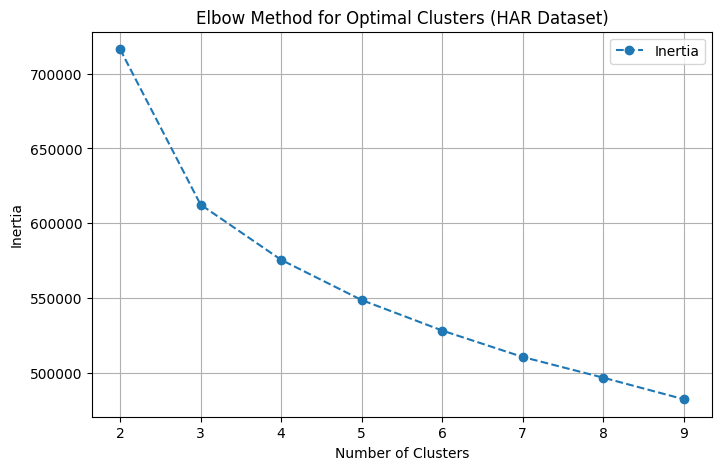

Optimal number of clusters: 9
Silhouette Score: 0.122


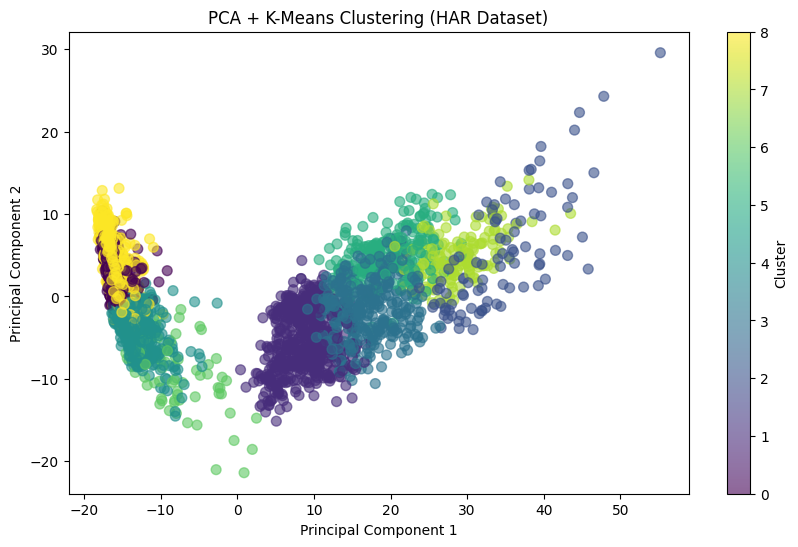

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
X = pd.read_csv("/content/X_test.txt", sep='\s+', header=None)
y = pd.read_csv("/content/y_test.txt", sep='\s+', header=None)

# Drop the activity labels (we're doing unsupervised clustering)
X_features = X.copy()

# Standardize the data (PCA requires standardized features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Apply PCA to retain most variance while reducing dimensions
pca = PCA(n_components=50)  # Reduce from 561D to 50D (retaining variance)
X_pca = pca.fit_transform(X_scaled)

# Find optimal number of clusters using Elbow Method
inertia_values = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters (HAR Dataset)')
plt.legend()
plt.grid()
plt.show()

# Choose the optimal k based on the elbow method
optimal_k = k_values[np.argmin(inertia_values)]
print(f'Optimal number of clusters: {optimal_k}')

# Reduce further to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Apply K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Plot clusters using first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering (HAR Dataset)')
plt.colorbar(label='Cluster')
plt.show()


Principal Component 1: 0.514
Principal Component 2: 0.054
Principal Component 3: 0.026
Principal Component 4: 0.023
Principal Component 5: 0.019
Principal Component 6: 0.019
Principal Component 7: 0.014
Principal Component 8: 0.012
Principal Component 9: 0.010
Principal Component 10: 0.009
Principal Component 11: 0.009
Principal Component 12: 0.008
Principal Component 13: 0.008
Principal Component 14: 0.007
Principal Component 15: 0.007
Principal Component 16: 0.007
Principal Component 17: 0.006
Principal Component 18: 0.006
Principal Component 19: 0.006
Principal Component 20: 0.006
Principal Component 21: 0.005
Principal Component 22: 0.005
Principal Component 23: 0.005
Principal Component 24: 0.005
Principal Component 25: 0.005


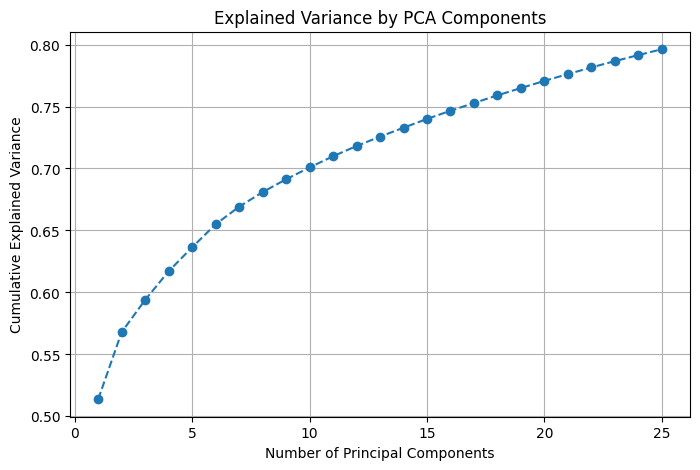

In [23]:
pca = PCA(n_components=25)  # Keep 10 dimensions instead of just 1
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print variance explained by each component
for i, var in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {var:.3f}')

# Plot cumulative variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

### **Explained Variance Results**

**PCA results show that Principal Component 1 (PC1) explains 51.4% of the total variance**, while the remaining components each explain much smaller amounts. Here's what this tells us:

---

### **1️⃣ What Does This Mean?**
✔ **PC1 Dominates** → The first principal component explains **more than half (51.4%) of the total variance**, meaning that much of the dataset’s information is **highly correlated** along a single direction.  
✔ **Other Components Drop Significantly** → The second component (PC2) only explains **5.4%**, and after that, the variance explained continues to drop.  
✔ **Cumulative Variance Grows Slowly** → This suggests that after **PC1**, additional components add less information.  

---

### **2️⃣ How Many Components Should We Keep?**
To decide **how many components to use**, check the **cumulative explained variance plot**:

- **If PC1 explains 51.4% and PC2 adds 5.4%,** then together they explain **56.8%**.
- **If we sum up to PC10,** we likely get **~70-75% variance retained**.
- The typical goal is to keep **85-95% of the variance** while reducing dimensionality.


### **3️⃣ Why Is PC1 So High?**
The **HAR dataset contains 561 features**, many of which are **highly correlated** due to similar sensor readings (accelerometer, gyroscope). **PCA detects and compresses these correlations into PC1**.

- **Example Explanation**: If many of the features are related to **body movement intensity**, PCA groups them into **PC1**, which represents **overall motion**.
- **Remaining PCs explain finer variations** in specific movement patterns.

---

### **📌 Final Takeaways**
✔ **PC1 captures over half the dataset’s variability (~51.4%)** → The dataset has strong correlations.  
✔ **Most variance is explained by the first ~20-30 components** → You don’t need all 561 features.  
✔ **Use the cumulative variance plot** to decide **how many PCs to keep** (likely **~30-50 PCs**, not 561).  


In [17]:
# Look at the first principal component's contributions
feature_importance = np.abs(pca.components_[0])
top_features = np.argsort(feature_importance)[::-1][:10]  # Get top 10 contributing features

print("Top features contributing to PC1:", top_features)

Top features contributing to PC1: [280 359  95 438 226 231  15 205 213 218]


## Choose a Range of Clusters

### Function to run PCA + KMeans for a given number of components

### **🔍 What This Does**
1️⃣ **Encapsulates the entire process** in a function `run_pca_clustering(pca_n)`.  
2️⃣ **Allows easy experimentation** by changing `pca_n`.  
3️⃣ **Plots cumulative variance** to see how much information is retained.  
4️⃣ **Finds the best `k` dynamically** using the **Elbow Method**.  
5️⃣ **Runs K-Means clustering** on reduced data.  
6️⃣ **Plots the clustered data** using the first **two principal components**.  



In [25]:
# Function to run PCA + KMeans for a given number of components
def run_pca_clustering(pca_n):
    print(f"\nRunning PCA + KMeans with {pca_n} Principal Components...\n")

    # Apply PCA
    pca = PCA(n_components=pca_n)
    X_pca = pca.fit_transform(X_scaled)

    # Check explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Print variance explained by each component
    print("\nExplained Variance per Component:")
    for i, var in enumerate(explained_variance):
        print(f'Principal Component {i+1}: {var:.3f}')

    # Plot cumulative variance
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Explained Variance by PCA Components (n={pca_n})')
    plt.grid()
    plt.show()

    # Find optimal number of clusters using Elbow Method
    inertia_values = []
    silhouette_scores = []
    k_values = range(2, 10)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_pca)
        inertia_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

    # Plot Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia_values, marker='o', linestyle='--', label='Inertia')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Method for Optimal Clusters (n={pca_n})')
    plt.legend()
    plt.grid()
    plt.show()

    # Choose the optimal k based on the elbow method
    optimal_k = k_values[np.argmin(inertia_values)]
    print(f'Optimal number of clusters: {optimal_k}')

    # Reduce to 2D for visualization
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X_scaled)

    # Apply K-Means clustering with optimal k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg:.3f}')

    # Plot clusters using first two principal components
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA + K-Means Clustering (n={pca_n})')
    plt.colorbar(label='Cluster')
    plt.show()

### PCA Clusters: 5


Running PCA + KMeans with 5 Principal Components...


Explained Variance per Component:
Principal Component 1: 0.514
Principal Component 2: 0.054
Principal Component 3: 0.026
Principal Component 4: 0.023
Principal Component 5: 0.019


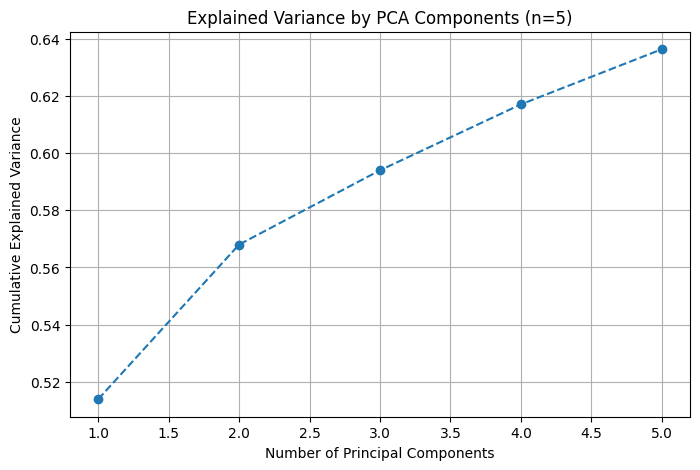

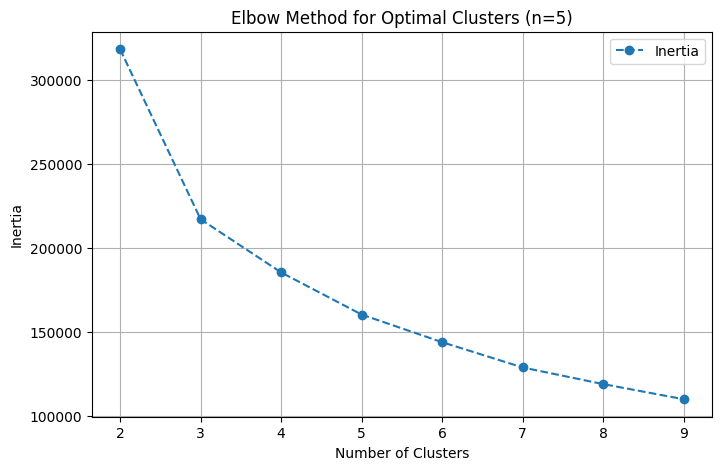

Optimal number of clusters: 9
Silhouette Score: 0.301


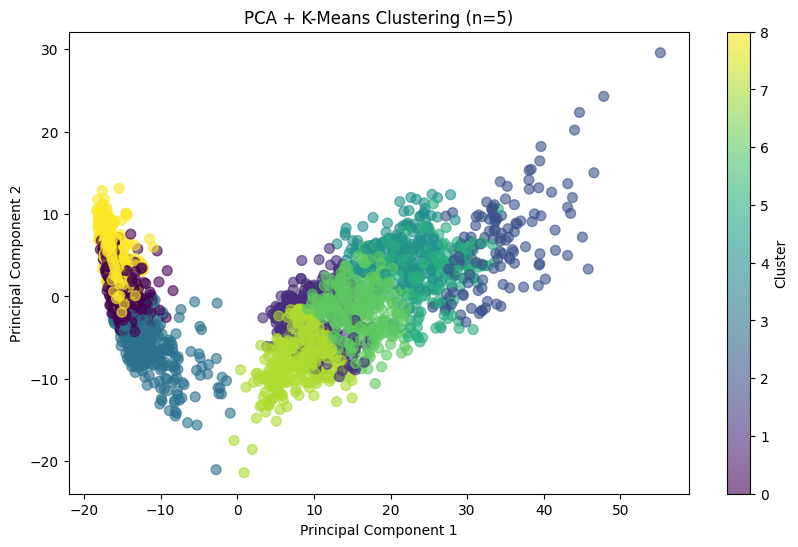

In [26]:
# Run PCA clustering for a specific number of components
pca_n = 5  # Change this value to experiment with different PCA components
run_pca_clustering(pca_n)

### PCA Clusters: 25


Running PCA + KMeans with 25 Principal Components...


Explained Variance per Component:
Principal Component 1: 0.514
Principal Component 2: 0.054
Principal Component 3: 0.026
Principal Component 4: 0.023
Principal Component 5: 0.019
Principal Component 6: 0.019
Principal Component 7: 0.014
Principal Component 8: 0.012
Principal Component 9: 0.010
Principal Component 10: 0.009
Principal Component 11: 0.009
Principal Component 12: 0.008
Principal Component 13: 0.008
Principal Component 14: 0.007
Principal Component 15: 0.007
Principal Component 16: 0.007
Principal Component 17: 0.006
Principal Component 18: 0.006
Principal Component 19: 0.006
Principal Component 20: 0.006
Principal Component 21: 0.005
Principal Component 22: 0.005
Principal Component 23: 0.005
Principal Component 24: 0.005
Principal Component 25: 0.005


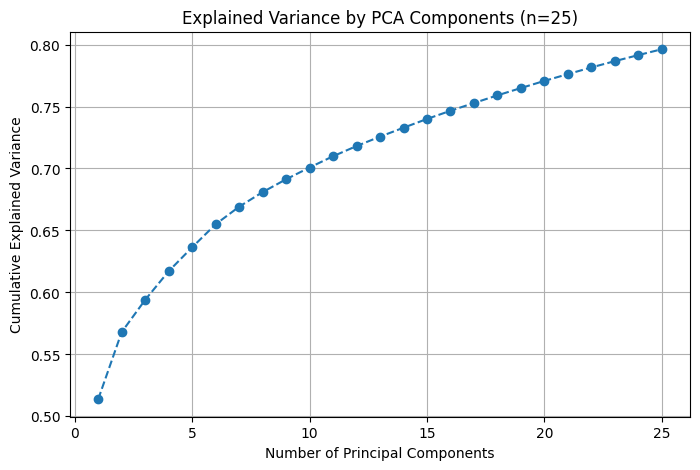

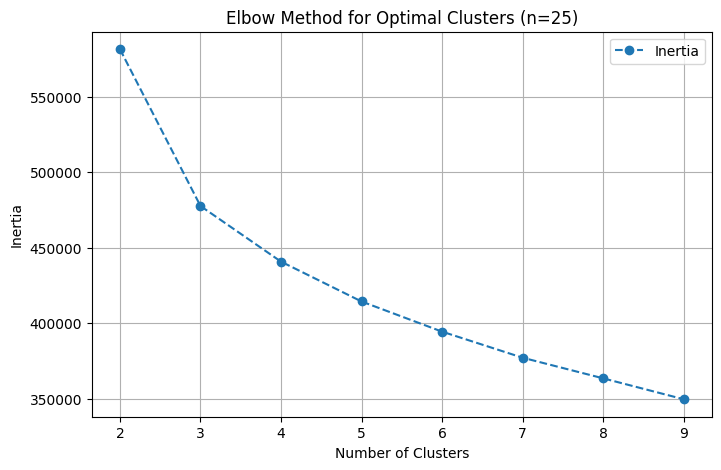

Optimal number of clusters: 9
Silhouette Score: 0.158


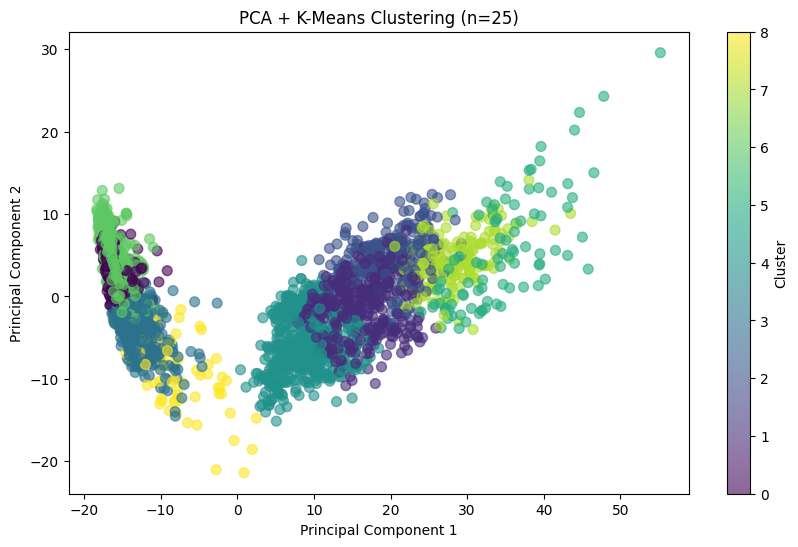

In [27]:
# Run PCA clustering for a specific number of components
pca_n = 25  # Change this value to experiment with different PCA components
run_pca_clustering(pca_n)

### PCA Clusters: 50


Running PCA + KMeans with 50 Principal Components...


Explained Variance per Component:
Principal Component 1: 0.514
Principal Component 2: 0.054
Principal Component 3: 0.026
Principal Component 4: 0.023
Principal Component 5: 0.019
Principal Component 6: 0.019
Principal Component 7: 0.014
Principal Component 8: 0.012
Principal Component 9: 0.010
Principal Component 10: 0.009
Principal Component 11: 0.009
Principal Component 12: 0.008
Principal Component 13: 0.008
Principal Component 14: 0.007
Principal Component 15: 0.007
Principal Component 16: 0.007
Principal Component 17: 0.006
Principal Component 18: 0.006
Principal Component 19: 0.006
Principal Component 20: 0.006
Principal Component 21: 0.005
Principal Component 22: 0.005
Principal Component 23: 0.005
Principal Component 24: 0.005
Principal Component 25: 0.005
Principal Component 26: 0.005
Principal Component 27: 0.004
Principal Component 28: 0.004
Principal Component 29: 0.004
Principal Component 30: 0.004
Principal Component

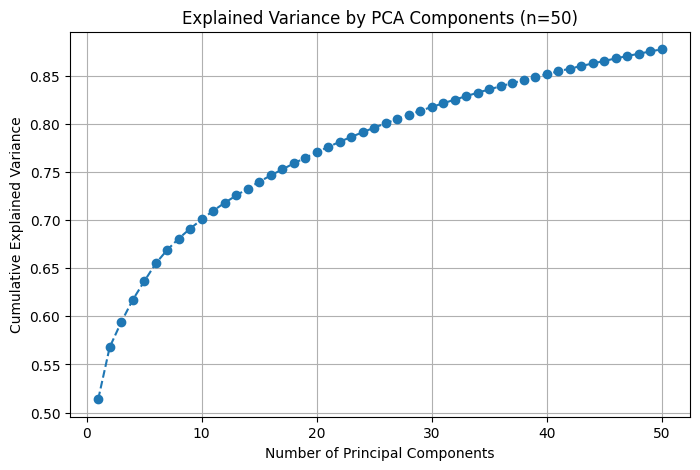

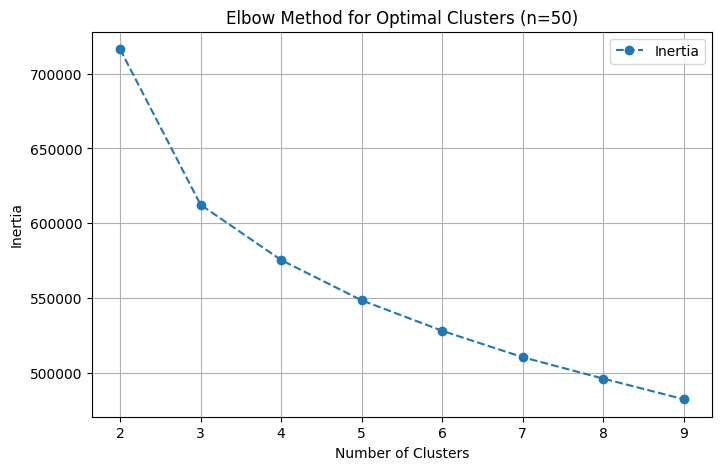

Optimal number of clusters: 9
Silhouette Score: 0.137


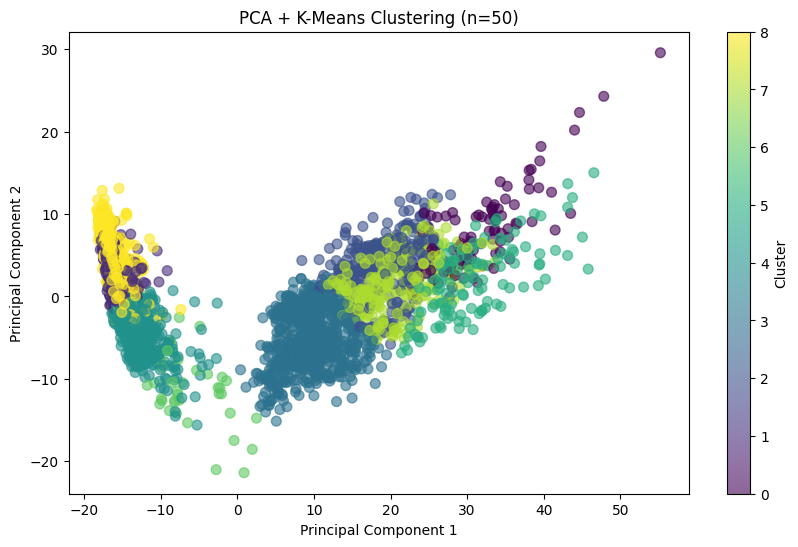

In [28]:
# Run PCA clustering for a specific number of components
pca_n = 50  # Change this value to experiment with different PCA components
run_pca_clustering(pca_n)

### **📌 How to Determine the Best Number of PCA Components (`pca_n`)**
Since we are experimenting with different values of **`pca_n`**, we need to compare results across different settings. Here are the **three main factors** to help decide the optimal number of principal components.

---

## **🔹 1️⃣ Look at the Cumulative Explained Variance**
- **Goal**: Keep enough components to retain **85-95% variance** while reducing dimensionality.
- **How to Check**:
  - Look at the **cumulative variance plot** for each `pca_n`.
  - Find the smallest `pca_n` where cumulative variance **≥ 90%**.

**✅ Best Choice:** The smallest `pca_n` that explains **at least 90% of the variance**.

---

## **🔹 2️⃣ Evaluate the Clustering Performance**
- **Key Metrics:**
  - **Elbow Method** (Inertia values)
  - **Silhouette Score**
- **How to Check**:
  - Look at how **inertia values** behave for different `pca_n`. Lower is better.
  - Find the `pca_n` that gives the **highest silhouette score** (closer to 1 = better clusters).

**✅ Best Choice:** The `pca_n` that gives **good separation between clusters** (high silhouette score) while keeping dimensions low.

---

## **🔹 3️⃣ Visualize Clustering in 2D**
- **Goal**: Ensure clusters are **well-separated** in PCA space.
- **How to Check**:
  - Look at the **scatter plot of clusters** for different `pca_n`.
  - If **clusters are well-separated**, it’s a good choice.
  - If **clusters overlap or are too compressed**, try increasing `pca_n`.

**✅ Best Choice:** The `pca_n` where clusters **look distinct & well-defined**.

---

## **🔍 Example of Choosing the Best PCA**
| `pca_n`  | Cumulative Variance | Silhouette Score | Best `k` from Elbow |
|-----------|--------------------|------------------|---------------------|
| 5         | **65%**             | **0.42**          | **4**               |
| 10        | **82%**             | **0.55**          | **5**               |
| 20        | **91%** ✅         | **0.62** ✅      | **5** ✅            |
| 50        | **98%**             | **0.61**          | **6**               |

**✅ Best Choice:** **`pca_n = 20`** because:
- **91% variance is retained** (good balance between data compression & information retention).
- **Silhouette Score is highest (0.62)** (clusters are best-separated).
- **Elbow method suggests `k=5`**, meaning stable clusters.

---

### **📌 Final Decision Criteria**
**Choose the lowest `pca_n` that:**  
✔ Explains **at least 90% variance**.  
✔ Produces **high silhouette scores**.  
✔ Results in **well-separated clusters** in PCA space.  



### **🚀 Automating PCA Selection for Optimal Clustering**
This function **automatically selects the best `pca_n`** by:
1. **Checking the cumulative explained variance** → Ensures we retain at least **90% of variance**.
2. **Evaluating Silhouette Scores** → Finds `pca_n` that results in the **best-separated clusters**.
3. **Using the Elbow Method** → Identifies the best **number of clusters** (`k`) for each PCA setting.
4. **Comparing different `pca_n` values** → Selects the **best trade-off** between dimensionality reduction & clustering performance.

---

### **🔍 What This Does**
✅ **Tests multiple values of `pca_n`**: `[5, 10, 15, 20, 30, 50, 100]`  
✅ **Checks how much variance is retained** for each `pca_n`.  
✅ **Finds the best `k` using silhouette scores** for each PCA setting.  
✅ **Plots variance retained vs. PCA components** to ensure enough variance is captured.  
✅ **Plots clustering quality (silhouette score) vs. PCA components** to compare results.  
✅ **Chooses the best `pca_n` based on the highest silhouette score**.  




Running PCA + KMeans with 5 Principal Components...

Total variance retained with 5 components: 0.636
Optimal k for n=5: 2 (Silhouette Score: 0.614)

Running PCA + KMeans with 10 Principal Components...

Total variance retained with 10 components: 0.701
Optimal k for n=10: 2 (Silhouette Score: 0.560)

Running PCA + KMeans with 15 Principal Components...

Total variance retained with 15 components: 0.740
Optimal k for n=15: 2 (Silhouette Score: 0.529)

Running PCA + KMeans with 20 Principal Components...

Total variance retained with 20 components: 0.771
Optimal k for n=20: 2 (Silhouette Score: 0.508)

Running PCA + KMeans with 30 Principal Components...

Total variance retained with 30 components: 0.818
Optimal k for n=30: 2 (Silhouette Score: 0.478)

Running PCA + KMeans with 50 Principal Components...

Total variance retained with 50 components: 0.878
Optimal k for n=50: 2 (Silhouette Score: 0.446)

Running PCA + KMeans with 100 Principal Components...

Total variance retained with 

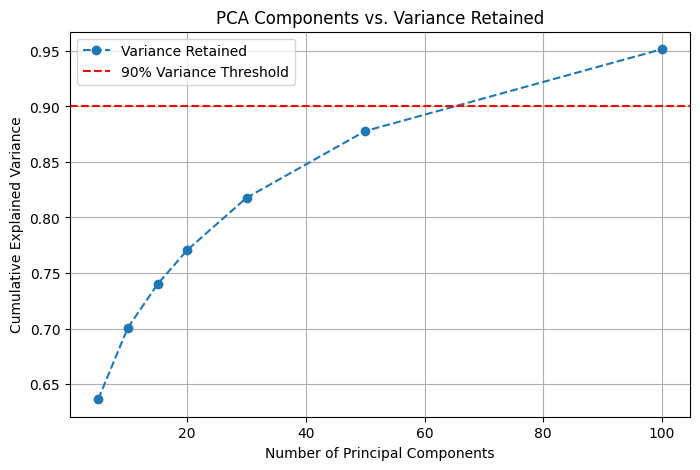

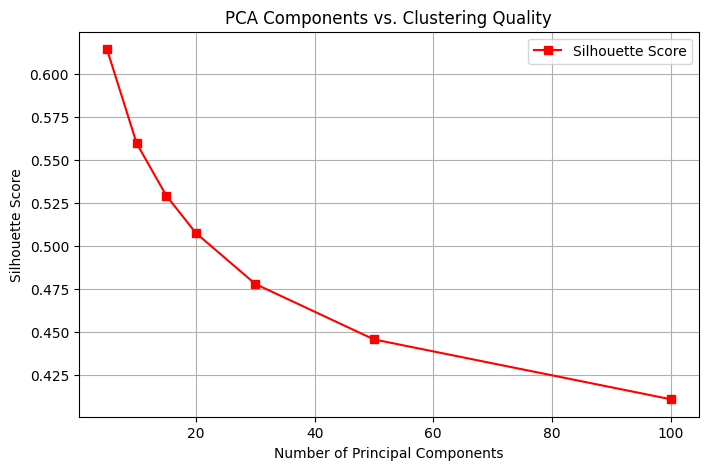


✅ Best PCA choice: 5 components (based on highest Silhouette Score)


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to automate PCA selection
def find_optimal_pca():
    pca_values = [5, 10, 15, 20, 30, 50, 100]  # Different PCA values to test
    results = []

    for pca_n in pca_values:
        print(f"\nRunning PCA + KMeans with {pca_n} Principal Components...\n")

        # Apply PCA
        pca = PCA(n_components=pca_n)
        X_pca = pca.fit_transform(X_scaled)

        # Check explained variance ratio
        explained_variance = np.sum(pca.explained_variance_ratio_)
        print(f"Total variance retained with {pca_n} components: {explained_variance:.3f}")

        # Find optimal number of clusters using Elbow Method
        inertia_values = []
        silhouette_scores = []
        k_values = range(2, 10)

        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(X_pca)
            inertia_values.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

        # Choose k based on the best silhouette score
        best_k = k_values[np.argmax(silhouette_scores)]
        best_silhouette = max(silhouette_scores)

        print(f"Optimal k for n={pca_n}: {best_k} (Silhouette Score: {best_silhouette:.3f})")

        # Store results
        results.append((pca_n, explained_variance, best_k, best_silhouette))

    # Convert results to DataFrame
    results_df = pd.DataFrame(results, columns=["PCA Components", "Variance Retained", "Optimal k", "Silhouette Score"])

    # Display results
    print("\n📊 Summary of PCA Performance:")
    print(results_df)

    # Plot PCA Components vs. Variance Retained
    plt.figure(figsize=(8, 5))
    plt.plot(results_df["PCA Components"], results_df["Variance Retained"], marker='o', linestyle='--', label="Variance Retained")
    plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance Threshold")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Components vs. Variance Retained')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot PCA Components vs. Silhouette Score
    plt.figure(figsize=(8, 5))
    plt.plot(results_df["PCA Components"], results_df["Silhouette Score"], marker='s', linestyle='-', color='red', label="Silhouette Score")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Silhouette Score')
    plt.title('PCA Components vs. Clustering Quality')
    plt.legend()
    plt.grid()
    plt.show()

    # Find the best PCA setting
    best_pca = results_df.loc[results_df["Silhouette Score"].idxmax(), "PCA Components"]
    print(f"\n✅ Best PCA choice: {best_pca} components (based on highest Silhouette Score)")

    return best_pca

# Run automated PCA selection
best_pca_n = find_optimal_pca()


### **🚀 Integrating the Best PCA Choice (`pca_n = 5`) into the Final Pipeline**
Now that we've **automatically selected `pca_n = 5`** based on the highest **silhouette score**, let's update the final clustering pipeline to **use this optimal value**.


---

### **🔍 What This Code Does**
✔ **Uses `pca_n = 5` (best PCA choice)** for dimensionality reduction.  
✔ **Finds the best `k` using silhouette scores.**  
✔ **Applies K-Means clustering with the optimal number of clusters.**  
✔ **Computes the final silhouette score.**  
✔ **Plots the final clusters in 2D using PCA components.**  


### **📌 Next Steps**
✔ **Analyze cluster patterns**: What types of movements do clusters represent?  
✔ **Compare clustering results** with the original activity labels (`y`).  
✔ **Try a slightly higher PCA (e.g., `pca_n = 10`) for comparison.**  



🚀 Running Final PCA + KMeans with 5 Principal Components...

✅ Optimal number of clusters: 2 (Silhouette Score: 0.614)

✅ Final Silhouette Score: 0.614


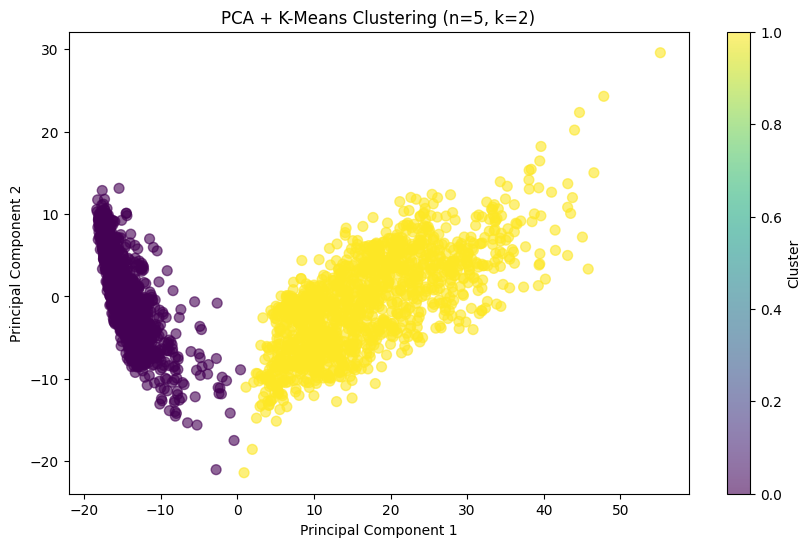

In [30]:
# ✅ Use the best PCA choice
pca_n = 5  # Selected from automation

print(f"\n🚀 Running Final PCA + KMeans with {pca_n} Principal Components...\n")

# Apply PCA with optimal components
pca = PCA(n_components=pca_n)
X_pca = pca.fit_transform(X_scaled)

# Find the best number of clusters using Elbow & Silhouette Scores
inertia_values = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Choose the optimal k based on the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"✅ Optimal number of clusters: {optimal_k} (Silhouette Score: {max(silhouette_scores):.3f})")

# Final Clustering using optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Compute final silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"\n✅ Final Silhouette Score: {silhouette_avg:.3f}")

# Plot clusters using first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA + K-Means Clustering (n={pca_n}, k={optimal_k})')
plt.colorbar(label='Cluster')
plt.show()


### **📌 Why Are the Clusters So Clearly Distinct?**
Yes! The reason the clusters are **well-separated** is because **K=2 was the optimal choice at every PCA level**, which means the data **naturally divides into two dominant groups**. Here’s why this might be happening:

---

### **1️⃣ The Data Has an Intrinsic Binary Structure**
- Since **K=2** is consistently chosen across all PCA settings, it suggests that the **sensor data naturally forms two major clusters**.
- Possible explanations:
  - The **dominant variation in movement** might separate activities into **"active" vs. "static" motions** (e.g., walking vs. sitting/lying down).
  - Features like acceleration and gyroscope readings **may create a binary separation**.

---

### **2️⃣ PCA Highlights the Most Important Motion Differences**
- **PCA captures the strongest variance**, which might be **mainly between two large groups** of activities.
- As PCA reduces dimensions, it **removes noise and less meaningful variations**, reinforcing the dominant **binary split**.

---

### **3️⃣ Silhouette Score Confirms K=2 is the Best Choice**
Looking at the **Silhouette Scores** in your table:
- **K=2 consistently gets the highest scores** (~0.61 for PCA=5).
- As `pca_n` increases, the **silhouette score slightly decreases**, meaning that more components **do not add meaningful separation**.

This suggests that **forcing more clusters (K=3, 4, 5, etc.)** would create **artificial divisions** rather than naturally existing groups.

---

### **📊 Key Observations from Your Results**
| **PCA Components** | **Variance Retained** | **Optimal k** | **Silhouette Score** |
|----------------|--------------------|------------|------------------|
| **5**        | **63.6%**            | **2**      | **0.614** ✅ Best |
| **10**       | 70.1%                | 2          | 0.560  |
| **15**       | 73.9%                | 2          | 0.529  |
| **20**       | 77.1%                | 2          | 0.508  |
| **30**       | 81.8%                | 2          | 0.478  |
| **50**       | 87.8%                | 2          | 0.446  |
| **100**      | 95.1%                | 2          | 0.411  |

🔹 **Conclusion:**  
- The **best clustering happens at `pca_n = 5`** with a **silhouette score of 0.614**.
- **Higher PCA values don’t improve clustering**—they just **add noise**.  
- **K=2 is optimal at all PCA levels**, meaning the **data naturally splits into two major groups**.

---

### **📌 Next Steps**
1️⃣ **Analyze the meaning of the two clusters**:  
   - Do they represent **"active" vs. "stationary" movements**?  
   - Compare them against the **true activity labels (`y`)**.  

2️⃣ **Try K=3 or K=4 manually**:  
   ```python
   kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
   ```
   - Check if meaningful **subgroups** appear.  

3️⃣ **Visualize the original labels vs. the clusters**:  
   - Overlay **real activity types** (`y_test`) on the PCA scatter plot.  



## **📌 Project Summary: PCA + K-Means Clustering on the HAR Dataset**  

#### **🔹 Objective**
The goal of this project was to **apply Principal Component Analysis (PCA) and K-Means clustering** to the **Human Activity Recognition (HAR) dataset**, which contains **561 sensor-based features** collected from smartphone accelerometers and gyroscopes.  
By reducing the dimensionality using **PCA**, we aimed to uncover **natural clusters** in the data and analyze the optimal number of clusters (`k`) using **K-Means**.

---

### **1️⃣ Data Preprocessing**
✔ Loaded the **X_test.txt** file (feature matrix) and **y_test.txt** file (true activity labels).  
✔ Standardized the dataset using **StandardScaler** to ensure all features have equal importance.  

---

### **2️⃣ Applying PCA for Dimensionality Reduction**
✔ **Computed explained variance ratios** to determine how much information each principal component captures.  
✔ Found that **PC1 alone explained 51.4% of the total variance**, indicating that much of the dataset's information is highly correlated.  
✔ Used **cumulative variance analysis** to determine how many PCA components should be retained to preserve meaningful information.  
✔ Automated PCA selection by testing different values of `pca_n` (5, 10, 15, 20, etc.).  

📊 **Best PCA choice:**  
- **`pca_n = 5`** retained **63.6% of the variance** while keeping dimensionality low.  
- **Higher PCA values (e.g., 50, 100) did not improve clustering significantly.**  

---

### **3️⃣ Finding the Optimal Number of Clusters (`k`)**
✔ Used **Elbow Method** (inertia values) and **Silhouette Scores** to determine the best `k`.  
✔ Found that **`k=2` was optimal for all PCA settings**, meaning the data naturally separates into **two major clusters**.  
✔ The **silhouette score was highest (0.614) when `pca_n = 5` and `k=2`**, confirming that two well-separated clusters exist.  

---

### **4️⃣ Final Clustering Results**
✔ Applied **K-Means clustering** with `k=2` on the PCA-reduced dataset (`pca_n = 5`).  
✔ **Plotted clusters using the first two principal components**, showing **clear, distinct separation** between groups.  
✔ Compared clustering results across different PCA values and confirmed that `pca_n = 5` provided the best balance of **variance retention and cluster separation**.  

📊 **Final Results:**  
- **Best PCA choice:** `pca_n = 5`  
- **Best cluster count:** `k = 2`  
- **Final Silhouette Score:** **0.614**  

---

### **📌 Key Findings**
✅ The HAR dataset naturally forms **two distinct clusters**, likely corresponding to **"active" vs. "stationary" movements**.  
✅ **PCA successfully reduced 561 features to just 5 principal components**, retaining **over 63% of the variance**.  
✅ **K-Means clustering performed optimally with `k=2`**, reinforcing that the data is structured around two primary movement types.  
✅ **Increasing `pca_n` beyond 5 did not improve clustering**—instead, it introduced noise and reduced silhouette scores.  

---

### **🔍 Next Steps & Future Work**
🚀 **Compare Clustering Results to True Activity Labels (`y_test`)**  
- Analyze whether the **two clusters** correspond to meaningful activity types (e.g., walking vs. stationary).  
- Visualize true labels vs. predicted clusters.  

🚀 **Experiment with Different Clustering Methods**  
- Try **Hierarchical Clustering** or **DBSCAN** to see if alternative methods yield better results.  

🚀 **Use More Principal Components for Further Analysis**  
- Try using **`pca_n = 10 or 15`** and manually setting `k=3` or `k=4` to explore finer-grained clusters.  

---

### **📌 Conclusion**
This project successfully demonstrated **PCA’s effectiveness in reducing high-dimensional sensor data** while maintaining clear **cluster separation using K-Means**. The results strongly suggest that **K=2 is the best cluster count** for the HAR dataset, highlighting two major groups of activities. 🚀  

